# KNN MNIST

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Step 1: Data Preparation

In [10]:
df = pd.read_csv("../Datasets/MNIST-2/mnist_train.csv")
# print(df.head())
data = df.values
x = data[:,1:]
y = data[:,0]
print(x.shape, y.shape)

(42000, 784) (42000,)


In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(33600, 784) (33600,)
(8400, 784) (8400,)


## Step 2: KNN

In [19]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y,query_point, k=5):
    vals = []
    for i in range(x.shape[0]):
        vals.append((dist(x[i],query_point),y[i]))
    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    
    n_vals = np.unique(vals[:,1], return_counts=True)
    index = n_vals[1].argmax()
    pred = n_vals[0][index]
    return pred

In [20]:
def draw_img(sample):
    img = sample.reshape((28,28))
    plt.imshow(img, cmap="gray")
    plt.show()

## Step 2: Make Prediction

8
8.0


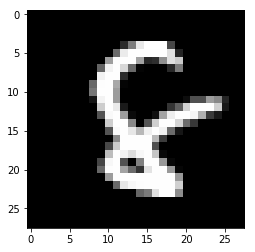

In [22]:
qp1 = x_test[0]
print(y_test[0])
print(knn(x_train,y_train,qp1))
draw_img(qp1)

7
7.0


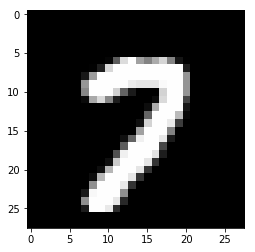

In [24]:
qp2 = x_test[1]
print(y_test[1])
print(knn(x_train,y_train,qp2))
draw_img(qp2)

## Step 3: Compute Accuracy

In [ ]:
acc = 0
for i in range(x_test.shape[0]):
    if(knn(x_train,y_train,x_test[i])==y_test[i]):
        acc += 1
acc /= x_test.shape[0]
print(acc)